Convergiu em 1509 iterações.


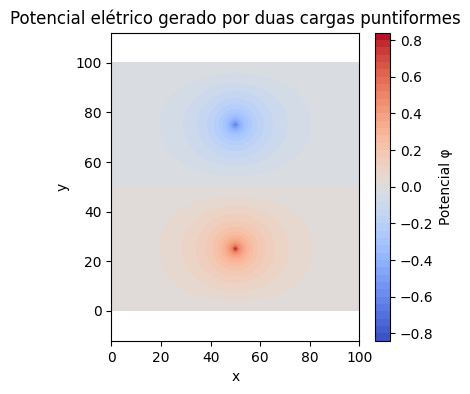

In [1]:
# Problema de duas cargas puntiformes usando a equação de Poisson

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros físicos e da malha
N = 100           # Tamanho do grid (N x N)
h = 1.0           # Espaçamento da malha
q = 1.0           # Valor da carga (em unidades arbitrárias)
epsilon0 = 1.0    # Permissividade elétrica do meio (valores arbitrários)
erro = 1e-5       # Critério de convergência para o método iterativo

# Inicializa as matrizes do potencial elétrico (phi) e da densidade de carga (rho)
phi = np.zeros((N+1, N+1))  # Potencial elétrico inicializado como zero em todos os pontos
rho = np.zeros((N+1, N+1))  # Densidade de carga inicializada como zero

# Define as posições das duas cargas pontuais
i1, j1 = 25, 50  # Posição da carga positiva +q
i2, j2 = 75, 50  # Posição da carga negativa -q

# Define a densidade de carga nos pontos específicos (aproximação da função delta)
rho[i1, j1] = q / h**2     # Carga positiva +q
rho[i2, j2] = -q / h**2    # Carga negativa -q

# Método de Gauss-Seidel para resolver a equação de Poisson iterativamente
delta = 1.0       # Inicializa o erro
iteracoes = 0     # Contador de iterações

# Loop até que o erro máximo entre iterações sucessivas seja menor que o valor definido
while delta > erro:
    delta = 0.0
    for i in range(1, N):          # Varre o domínio excluindo as bordas
        for j in range(1, N):
            phi_old = phi[i, j]    # Armazena o valor anterior do potencial
            # Atualiza o valor do potencial usando a equação de diferenças finitas
            phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * rho[i, j] / epsilon0)
            diff = abs(phi[i, j] - phi_old)  # Calcula a diferença entre iterações
            if diff > delta:
                delta = diff       # Atualiza o maior erro registrado nesta iteração
    iteracoes += 1

# Exibe o número de iterações até a convergência
print(f"Convergiu em {iteracoes} iterações.")

# Visualização do potencial elétrico em forma de mapa de contorno
plt.figure(figsize=(4,4))
plt.contourf(phi, levels=50, cmap='coolwarm')  # Mapa de contorno do potencial
plt.colorbar(label='Potencial φ')
plt.title("Potencial elétrico gerado por duas cargas puntiformes")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')  # Escalas iguais nos eixos
plt.show()


## Método das Diferenças Finitas

O Método das Diferenças Finitas é uma técnica numérica utilizada para resolver equações diferenciais, tanto ordinárias quanto parciais. A ideia principal do método é substituir as derivadas por aproximações baseadas em valores da função em pontos discretos. O domínio do problema é dividido em uma malha (ou grade), e as derivadas são estimadas utilizando expressões como:

- Derivada primeira: f'(x) ≈ (f(x+h) - f(x)) / h
- Derivada segunda: f''(x) ≈ (f(x+h) - 2f(x) + f(x−h)) / h²

Essas aproximações transformam a equação diferencial original em um sistema de equações algébricas, que pode ser resolvido utilizando métodos matriciais. O método das diferenças finitas é amplamente utilizado em problemas de engenharia e física, como condução de calor, dinâmica de fluidos e modelagem de estruturas.

